In [31]:
%config InlineBackend.figure_formats=['svg']
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [32]:
def get_attenuation():
    """
    Available attenuations.
    """
    Attenuation = [ 7.,   7.5,  8.,   8.5,  9.,   9.5, 10.,  10.5, 11.,  11.5, 12.,  12.5, 13.,  13.5,
                    14.,  14.5, 15.,  15.5, 16.,  16.5, 17.,  17.5, 18.,  18.5, 19.,  19.5, 20.,  20.5,
                    21.,  21.5, 22.,  22.5, 23.,  23.5, 24.,  24.5, 25.,  25.5, 26.,  26.5, 27.,  27.5,
                    28.,  28.5, 29. ]
    return Attenuation

def get_average():
    """
    Available average photon number.
    """
    Average = [7.08211260e+06, 5.15056588e+06, 3.72436481e+06, 2.71572185e+06,
                1.97472603e+06, 1.42408918e+06, 1.02232317e+06, 7.32125310e+05,
                5.24090642e+05, 3.74998464e+05, 2.66916821e+05, 1.89078950e+05,
                1.35700261e+05, 9.74077327e+04, 6.94691976e+04, 4.90518881e+04,
                3.50311232e+04, 2.50723929e+04, 1.77261578e+04, 1.26385561e+04,
                9.03448510e+03, 6.34776305e+03, 4.44228612e+03, 3.11561879e+03,
                2.20105919e+03, 1.55472974e+03, 1.10119877e+03, 7.74547737e+02,
                5.46214434e+02, 3.86814856e+02, 2.77270797e+02, 1.97954232e+02,
                1.39667657e+02, 9.96796628e+01, 7.12159618e+01, 5.03875460e+01,
                3.56871128e+01, 2.54771649e+01, 1.80622346e+01, 1.27380046e+01,
                9.02367143e+00, 6.40704597e+00, 4.54269070e+00, 3.20272751e+00,
                2.26309906e+00]
    return Average

In [33]:
def uniform(n_arr, max_ = 10):
    return np.concatenate([np.ones(max_) / len(n_arr), np.zeros(len(n_arr)-max_)])

In [34]:
def thermal(n_arr, average):
    n_arr = n_arr.astype('double')
    return average**n_arr / (1+average)**(n_arr+1)

In [35]:
def sum_poisson(n_arr, *params):
    average = get_average()[-len(params):]
    weights = params
    poisson_ = np.zeros(len(n_arr))
    
    for average_, amplitude_ in zip(average, weights):
        poisson_ += amplitude_ * poisson(mu = average_).pmf(n_arr)
    return poisson_

In [36]:
def single_poisson(n_arr, weight, average):
    return weight * poisson(mu = average).pmf(n_arr)

# Find a distribution

The goal is to find parameters for a known distribution $D_i$ that will follow as closely as possible a goal distribution $D_g$ for a photon number interval from 0 to N.
This is achieved by fitting $D_i$ on $D_g$ considering the probability mass function (PMF) of the distributions.

In [37]:
N = 50
w_u = 25
w_t = 10
n_arr = np.arange(N)
goal_function = 6* thermal(n_arr, w_t)
goal_function = 8 * uniform(n_arr, w_u)

In [38]:
popt_poisson , _ = curve_fit(sum_poisson, n_arr, goal_function, p0 = [0.1]*10 ,bounds=(0, [1]*10))
# popt_single_poisson , _ = curve_fit(single_poisson, n_arr, goal_function)
# popt_thermal , _ = curve_fit(thermal, n_arr, goal_function)

In [39]:
print('Sum Poisson : ', *popt_poisson, sep=", ")
# print('Single Poisson : ',*popt_single_poisson, sep=", ")
# print('Thermal : ',*popt_thermal, sep=", ")

Sum Poisson : , 1.3347144974841054e-12, 1.0001967927827792e-16, 0.5343427024017595, 0.9999999999839756, 0.9587168899029154, 0.15790097856375537, 0.7090424651904489, 2.7690355487482313e-18, 7.008103838013518e-30, 0.6182300269712162


# Plot function

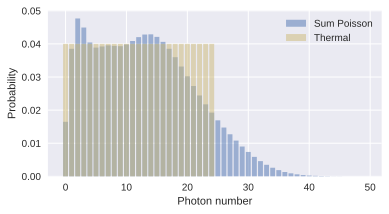

In [40]:
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(6,3), dpi=100)
    #plt.plot(n_arr, uniform(n_arr, w), label = 'Uniform')
    plt.bar(n_arr, sum_poisson(n_arr, *popt_poisson) / sum_poisson(n_arr, *popt_poisson).sum(), label = 'Sum Poisson', alpha=0.5)
    #plt.plot(n_arr, single_poisson(n_arr, *popt_single_poisson), label = 'Single Poisson')
    #plt.plot(n_arr, thermal(n_arr, popt_thermal), label = 'Thermal')
    plt.bar([],[])
    plt.bar([],[])
    plt.bar([],[])
    plt.bar(n_arr, goal_function / goal_function.sum(), label = 'Thermal', alpha=0.5)
    plt.ylabel('Probability')
    plt.xlabel('Photon number')
    plt.legend()
    #plt.savefig('distribution.pdf', format='pdf', bbox_inches='tight')
    plt.show()